In [11]:
%pwd

'C:\\Users\\memo_\\PycharmProjects\\Microchannels'

In [12]:
import numpy as np
# from source import materials
# from source import microchannels
from microchannels import Microchannel
from materials import Copper, Air
# from source import hyperheuristic as hh
# import tools as tl
import benchmark_func as bf
from customhys import hyperheuristic as hh
from customhys import metaheuristic as mh
from customhys import tools as tl

In [21]:
class MicrochannelDesign(bf.BasicProblem):
    def __init__(self, variable_num=3):
        super().__init__(variable_num)

        copper = Copper()
        air = Air()
        self.mh = Microchannel(base=copper, coolant=air)

        #self.mh.W_d

        self.max_search_range = np.array([self.mh.W_d, self.mh.W_d, 0.005])
        self.min_search_range = np.array([1e-32] * self.variable_num)
        #self.optimal_solution = np.array([0.] * self.variable_num)
        #self.global_optimum_solution = 0.
        self.func_name = 'MicrochannelDesign'
        self.features = {'Continuous': True,
                         'Differentiable': True,
                         'Separable': False,
                         'Scalable': True,
                         'Unimodal': False,
                         'Convex': False}

    def get_func_val(self, variables, *args):
        # self.mh.H_c = variables * 2
        self.mh.w_w = variables[0]
        self.mh.w_c = variables[1]
        self.mh.G_d = variables[2]
        return self.mh.sgen

In [26]:
fun = MicrochannelDesign()
fun.get_func_val([1e-6, 1e-4, 0.001])

0.13169301671692812

In [27]:
# dime = 3
# cate = fun.get_features()
prob = fun.get_formatted_problem(is_constrained=True)
#weig = tl.read_json('./source/collections/operators_weights.json')[str(dime)][cate]

with open('./source/collections/' + 'default.txt', 'r') as operators_file:
    heuristic_space = [eval(line.rstrip('\n')) for line in operators_file]

# hyp = hh.Hyperheuristic(heuristic_space=heuristic_space, problem=prob ,file_label ='MC-Exp1')
# sol,perf,e_sol=hyp.run()

heur = [(
    "differential_mutation",
         {"expression": "current-to-best", "num_rands": 2, "factor": 1.0} ,
    "greedy")]
met = mh. Metaheuristic(prob , heur , num_iterations=1000)
met.run()

# print(sol)

In [28]:
met.historical

{'fitness': [array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(inf),
  array(i

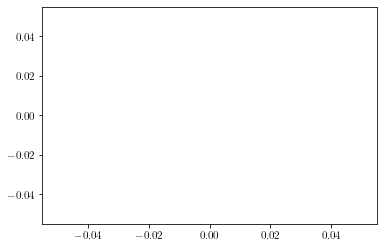

In [25]:
import matplotlib.pyplot as plt

plt.plot(met.historical["fitness"])
plt.show()

In [ ]:
# from source import experiment as ex
# expe = ex.Experiment()
# expe.hh_config
# expe.exp_config
# expe.prob_config
# expe.run()